In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
msg = pd.read_csv('df_all_update.csv')
msg.head(5)

,time_text,author.name,author.id,message,dtect_lang,trans_eng
0,-0:24,Venancio Reyna,UCeSuNe9wK0n2bahv0X6PkZQ,México :sparkles::heart_on_fire:,en,México :sparkles::heart_on_fire:
1,-0:23,Ploylymumu,UCos_UgTKQQZEUXLbbl2Y9dg,🇹🇭:blue_heart:,en,🇹🇭:blue_heart:
2,-0:23,Oemah Printing,UC1XCKk9xzLwUMgY8f7QsdYQ,indonesia,id,Indonesia
3,-0:23,Tiên Hoàng,UCnXDXORGJCjrgsa7TkikVEw,VIỆT NAM 🇻🇳🇻🇳🇻🇳🇻🇳🇻🇳🇻🇳🇻🇳,vi,Vietnam 🇻🇳🇻🇳🇻🇳🇻🇳🇻🇳🇻🇳🇻🇳
4,-0:21,TRUONG NGUYEN,UCYVwchNJN8uZbD7SWFGaL5g,VIỆT NAM 🇻🇳🇻🇳🇻🇳🇻🇳🇻🇳🇻🇳🇻🇳,vi,Vietnam 🇻🇳🇻🇳🇻🇳🇻🇳🇻🇳🇻🇳🇻🇳


In [3]:
df_message = msg.drop(columns = ['dtect_lang'])
df_message.dropna(inplace=True)
df_message.drop(df_message.loc[df_message['trans_eng'] == 'error'].index, inplace=True)

display(df_message.info())
display(df_message.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94648 entries, 0 to 100522
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   time_text    94648 non-null  object
 1   author.name  94648 non-null  object
 2   author.id    94648 non-null  object
 3   message      94648 non-null  object
 4   trans_eng    94648 non-null  object
dtypes: object(5)
memory usage: 4.3+ MB


None

,time_text,author.name,author.id,message,trans_eng
0,-0:24,Venancio Reyna,UCeSuNe9wK0n2bahv0X6PkZQ,México :sparkles::heart_on_fire:,México :sparkles::heart_on_fire:
1,-0:23,Ploylymumu,UCos_UgTKQQZEUXLbbl2Y9dg,🇹🇭:blue_heart:,🇹🇭:blue_heart:
2,-0:23,Oemah Printing,UC1XCKk9xzLwUMgY8f7QsdYQ,indonesia,Indonesia
3,-0:23,Tiên Hoàng,UCnXDXORGJCjrgsa7TkikVEw,VIỆT NAM 🇻🇳🇻🇳🇻🇳🇻🇳🇻🇳🇻🇳🇻🇳,Vietnam 🇻🇳🇻🇳🇻🇳🇻🇳🇻🇳🇻🇳🇻🇳
4,-0:21,TRUONG NGUYEN,UCYVwchNJN8uZbD7SWFGaL5g,VIỆT NAM 🇻🇳🇻🇳🇻🇳🇻🇳🇻🇳🇻🇳🇻🇳,Vietnam 🇻🇳🇻🇳🇻🇳🇻🇳🇻🇳🇻🇳🇻🇳


EMOJI DETECTION, REMOVAL, COUNT, TRANSFORM

- Emoji Detection and Remove Emoji Flag

In [4]:
import advertools as adv
import re
import emoji

In [5]:
list_message = df_message['message'].tolist()
emoji_summary = adv.extract_emoji(list_message)

In [6]:
def remove_emoji_flag(text):
    emoji_pattern = re.compile(
        u'(\U0001F1F2\U0001F1F4)|'       # Macau flag
        u'([\U0001F1E6-\U0001F1FF]{2})|' # flags
        u'([\U0001F600-\U0001F64F])'     # emoticons
        "+", flags=re.UNICODE)

    return emoji_pattern.sub('', text)


'''
def remove_emoji_all(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U0001F1F2-\U0001F1F4"  # Macau flag
        u"\U0001F1E6-\U0001F1FF"  # flags
        u"\U0001F600-\U0001F64F"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U0001F1F2"
        u"\U0001F1F4"
        u"\U0001F620"
        u"\u200d"
        u"\u2640-\u2642"
        "]+"
        ":[a-z_]+:", flags=re.UNICODE)

    return emoji_pattern.sub(r'', text)
'''

'\ndef remove_emoji_all(text):\n    emoji_pattern = re.compile("["\n        u"😀-🙏"  # emoticons\n        u"🌀-🗿"  # symbols & pictographs\n        u"🚀-\U0001f6ff"  # transport & map symbols\n        u"\U0001f1e0-🇿"  # flags (iOS)\n        u"🇲-🇴"  # Macau flag\n        u"🇦-🇿"  # flags\n        u"😀-🙏"\n        u"✂-➰"\n        u"Ⓜ-🉑"\n        u"🤦-🤷"\n        u"🇲"\n        u"🇴"\n        u"😠"\n        u"\u200d"\n        u"♀-♂"\n        "]+"\n        ":[a-z_]+:", flags=re.UNICODE)\n\n    return emoji_pattern.sub(r\'\', text)\n'

In [7]:
df_message['msg_emoji_noflag'] = df_message['trans_eng'].apply(remove_emoji_flag)
df_message

,time_text,author.name,author.id,message,trans_eng,msg_emoji_noflag
0,-0:24,Venancio Reyna,UCeSuNe9wK0n2bahv0X6PkZQ,México :sparkles::heart_on_fire:,México :sparkles::heart_on_fire:,México :sparkles::heart_on_fire:
1,-0:23,Ploylymumu,UCos_UgTKQQZEUXLbbl2Y9dg,🇹🇭:blue_heart:,🇹🇭:blue_heart:,:blue_heart:
2,-0:23,Oemah Printing,UC1XCKk9xzLwUMgY8f7QsdYQ,indonesia,Indonesia,Indonesia
3,-0:23,Tiên Hoàng,UCnXDXORGJCjrgsa7TkikVEw,VIỆT NAM 🇻🇳🇻🇳🇻🇳🇻🇳🇻🇳🇻🇳🇻🇳,Vietnam 🇻🇳🇻🇳🇻🇳🇻🇳🇻🇳🇻🇳🇻🇳,Vietnam
4,-0:21,TRUONG NGUYEN,UCYVwchNJN8uZbD7SWFGaL5g,VIỆT NAM 🇻🇳🇻🇳🇻🇳🇻🇳🇻🇳🇻🇳🇻🇳,Vietnam 🇻🇳🇻🇳🇻🇳🇻🇳🇻🇳🇻🇳🇻🇳,Vietnam
...,...,...,...,...,...,...
100518,3:47:41,Nusaba Monhinlad,UCpLe268BLWDUU1D8_s52uYw,อิงฟ้ารอง 1 ค่ะ,Ing Fah secondary,Ing Fah secondary
100519,3:47:41,Pitan Danlammajak,UCX2klqZuIij7ogH-dUf3QEg,เก่งที่สุดแล้วไทยแลนด์,"The best, Thailand","The best, Thailand"
100520,3:47:42,Sorayut Hitjamnong,UC9CoLEJZCcliohVQXvc8FBw,พี่ฟ้าเก่งที่สุดด สมมง:crown:🇧🇷 เลิฟฟ,Elder Fah is the best. Suppose: Crown: 🇧🇷 Leff,Elder Fah is the best. Suppose: Crown: Leff
100521,3:47:42,faii jilada,UCQmGE4TT2eZQBXehqCZbw-g,สมแล้ววว พี่อิงมาไกลสุดๆเลยยยย,"Alright, elder Ing has come so far.","Alright, elder Ing has come so far."


- Emoji Summary(Exclude Flag) and Count

In [8]:
list_message = df_message['msg_emoji_noflag'].tolist()
emoji_summary = adv.extract_emoji(list_message)
emoji_summary['top_emoji']

[('✌🏻', 301),
 ('👸🏻', 217),
 ('👏🏻', 84),
 ('☝🏻', 67),
 ('👸🏼', 62),
 ('👎🏻', 49),
 ('👍🏻', 46),
 ('💪🏻', 31),
 ('🤟🏻', 21),
 ('👏🏼', 18),
 ('1⃣', 14),
 ('✌🏾', 12),
 ('💅🏽', 12),
 ('✌🏼', 11),
 ('☝🏼', 7),
 ('👍🏼', 7),
 ('🤘🏻', 7),
 ('✍🏽', 7),
 ('👆🏻', 6),
 ('👏🏽', 6),
 ('♀', 6),
 ('0⃣', 5),
 ('💪🏼', 5),
 ('💃🏻', 5),
 ('👎🏽', 5),
 ('🤝', 5),
 ('👌🏻', 5),
 ('👎🏾', 5),
 ('👎🏼', 5),
 ('🧚🏻\u200d♀', 4),
 ('🤭', 4),
 ('👉🏻', 4),
 ('🤦🏻\u200d♀', 4),
 ('👋🏻', 4),
 ('💃🏾', 4),
 ('🤜🏻', 4),
 ('💃🏿', 3),
 ('👈🏻', 3),
 ('💁🏻\u200d♀', 3),
 ('🤟🏼', 3),
 ('💅🏻', 3),
 ('💃🏽', 3),
 ('2⃣', 2),
 ('💃🏼', 2),
 ('✍🏻', 2),
 ('3⃣', 1),
 ('☝', 1),
 ('🤞🏻', 1),
 ('🤦🏼\u200d♀', 1),
 ('👋🏼', 1),
 ('🤚🏻', 1),
 ('👸🏽', 1),
 ('✌🏽', 1),
 ('🆙', 1),
 ('5⃣', 1),
 ('4⃣', 1),
 ('👎🏿', 1),
 ('✋🏻', 1),
 ('🤏🏻', 1),
 ('✊🏻', 1),
 ('💪🏿', 1),
 ('♂', 1),
 ('🧚🏻', 1),
 ('🤛🏻', 1)]

In [36]:
top_emo_df = pd.DataFrame(emoji_summary['top_emoji'])
top_emo_df

,0,1
0,✌🏻,301
1,👸🏻,217
2,👏🏻,84
3,☝🏻,67
4,👸🏼,62
...,...,...
59,✊🏻,1
60,💪🏿,1
61,♂,1
62,🧚🏻,1


In [38]:
# convert emoji to text
def convert_emoji(text):
    return emoji.demojize(text)

top_emo_df['top_emoji_text'] = top_emo_df[0].apply(convert_emoji)
top_emo_df.head()


,0,1,top_emoji_text
0,✌🏻,301,:victory_hand_light_skin_tone:
1,👸🏻,217,:princess_light_skin_tone:
2,👏🏻,84,:clapping_hands_light_skin_tone:
3,☝🏻,67,:index_pointing_up_light_skin_tone:
4,👸🏼,62,:princess_medium-light_skin_tone:


- Convert Emoji to Text

In [9]:
def convert_emoji(text):
    return emoji.demojize(text)

In [10]:
df_message['messages_eng'] = df_message['msg_emoji_noflag'].apply(convert_emoji)
df_message

,time_text,author.name,author.id,message,trans_eng,msg_emoji_noflag,messages_eng
0,-0:24,Venancio Reyna,UCeSuNe9wK0n2bahv0X6PkZQ,México :sparkles::heart_on_fire:,México :sparkles::heart_on_fire:,México :sparkles::heart_on_fire:,México :sparkles::heart_on_fire:
1,-0:23,Ploylymumu,UCos_UgTKQQZEUXLbbl2Y9dg,🇹🇭:blue_heart:,🇹🇭:blue_heart:,:blue_heart:,:blue_heart:
2,-0:23,Oemah Printing,UC1XCKk9xzLwUMgY8f7QsdYQ,indonesia,Indonesia,Indonesia,Indonesia
3,-0:23,Tiên Hoàng,UCnXDXORGJCjrgsa7TkikVEw,VIỆT NAM 🇻🇳🇻🇳🇻🇳🇻🇳🇻🇳🇻🇳🇻🇳,Vietnam 🇻🇳🇻🇳🇻🇳🇻🇳🇻🇳🇻🇳🇻🇳,Vietnam,Vietnam
4,-0:21,TRUONG NGUYEN,UCYVwchNJN8uZbD7SWFGaL5g,VIỆT NAM 🇻🇳🇻🇳🇻🇳🇻🇳🇻🇳🇻🇳🇻🇳,Vietnam 🇻🇳🇻🇳🇻🇳🇻🇳🇻🇳🇻🇳🇻🇳,Vietnam,Vietnam
...,...,...,...,...,...,...,...
100518,3:47:41,Nusaba Monhinlad,UCpLe268BLWDUU1D8_s52uYw,อิงฟ้ารอง 1 ค่ะ,Ing Fah secondary,Ing Fah secondary,Ing Fah secondary
100519,3:47:41,Pitan Danlammajak,UCX2klqZuIij7ogH-dUf3QEg,เก่งที่สุดแล้วไทยแลนด์,"The best, Thailand","The best, Thailand","The best, Thailand"
100520,3:47:42,Sorayut Hitjamnong,UC9CoLEJZCcliohVQXvc8FBw,พี่ฟ้าเก่งที่สุดด สมมง:crown:🇧🇷 เลิฟฟ,Elder Fah is the best. Suppose: Crown: 🇧🇷 Leff,Elder Fah is the best. Suppose: Crown: Leff,Elder Fah is the best. Suppose: Crown: Leff
100521,3:47:42,faii jilada,UCQmGE4TT2eZQBXehqCZbw-g,สมแล้ววว พี่อิงมาไกลสุดๆเลยยยย,"Alright, elder Ing has come so far.","Alright, elder Ing has come so far.","Alright, elder Ing has come so far."


EXTRACT COUNTRY FROM MESSAGES

In [11]:
df_message.drop(columns=['trans_eng','msg_emoji_noflag'],inplace=True)

SENTENCE POLARIZATION

In [12]:
df = df_message

In [13]:
# sentiment analysis using TextBlob
from textblob import TextBlob

def sentiment_analysis_textblob(text):

    return TextBlob(text).sentiment.polarity

In [14]:
# sentiment analysis using nltk
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

def sentiment_analysis_nltk(text):
    return sid.polarity_scores(text)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\SSORAWIT\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [15]:
# sentiment analysis using vader
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def sentiment_analysis_vader(text):
    score = analyzer.polarity_scores(text)
    lb = score['compound']
    if lb >= 0.05:
        return 1
    elif (lb > -0.05) and (lb < 0.05):
        return 0
    else:
        return -1

In [16]:
# predict sentiment from each technique and pick the highest vote result

df['opinion_TextBlob'] = df['messages_eng'].apply(sentiment_analysis_textblob)
df['opinion_nltk'] = df['messages_eng'].apply(sentiment_analysis_nltk)
df['opinion_vader'] = df['messages_eng'].apply(sentiment_analysis_vader)

df['Sentiment_TextBlob'] = df['opinion_TextBlob'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))
df['Sentiment_nltk'] = df['opinion_nltk'].apply(lambda x: 'positive' if x['compound'] > 0 else ('negative' if x['compound'] < 0 else 'neutral'))
df['Sentiment_vader'] = df['opinion_vader'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

df_count = df[['Sentiment_TextBlob','Sentiment_nltk','Sentiment_vader']].apply(lambda x: x.value_counts(), axis=1)
df['Sentiment_final'] = df_count.idxmax(axis=1)

TEXT CLEANSING AND TRANSFORM

- Tokenize, Remove Stopword, punctuation, duplicate

In [17]:
import nltk

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from string import punctuation
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SSORAWIT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SSORAWIT\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\SSORAWIT\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [18]:
def remove_stopwords_punctuation_duplicate(text):
    words = nltk.word_tokenize(text)
    words = list(set(words))
    stopwords_list = stopwords.words('english')
    stopwords_list.append("'m")
    stopwords_list.append("n't")

    #words = [word for word in words if word not in stopwords_list and word not in string.punctuation]
    words = [word for word in words if word.lower() not in stopwords_list and word.lower() not in string.punctuation]
    text = " ".join(words)
    return text

In [19]:
df_clean = df.loc[:,['time_text','author.name','messages_eng','Sentiment_final']]
df_clean['Token'] = df_clean['messages_eng'].apply(remove_stopwords_punctuation_duplicate)
df_clean

,time_text,author.name,messages_eng,Sentiment_final,Token
0,-0:24,Venancio Reyna,México :sparkles::heart_on_fire:,neutral,sparkles México :heart_on_fire
1,-0:23,Ploylymumu,:blue_heart:,neutral,blue_heart
2,-0:23,Oemah Printing,Indonesia,neutral,Indonesia
3,-0:23,Tiên Hoàng,Vietnam,neutral,Vietnam
4,-0:21,TRUONG NGUYEN,Vietnam,neutral,Vietnam
...,...,...,...,...,...
100518,3:47:41,Nusaba Monhinlad,Ing Fah secondary,neutral,Fah secondary Ing
100519,3:47:41,Pitan Danlammajak,"The best, Thailand",positive,Thailand best
100520,3:47:42,Sorayut Hitjamnong,Elder Fah is the best. Suppose: Crown: Leff,positive,Suppose Leff Elder best Fah Crown
100521,3:47:42,faii jilada,"Alright, elder Ing has come so far.",positive,elder far come Alright Ing


In [ ]:
df_clean.to_csv('df_clean.csv',index=False)

<AxesSubplot:xlabel='Sentiment_final', ylabel='count'>

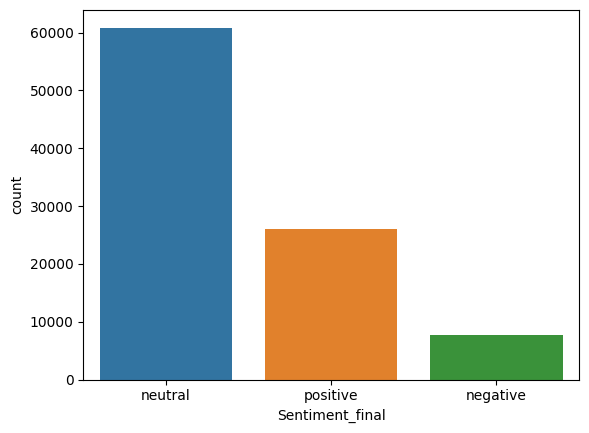

In [20]:
sns.countplot(data=df_clean,x='Sentiment_final')

- Lemmatization: transform word to their original form

In [21]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

In [22]:
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADJ
    else:
        return wordnet.NOUN

In [23]:
def lemmatizer(sentence):
    words_and_tags = nltk.pos_tag(word_tokenize(sentence))
    lemmas = []
    for word, tag in words_and_tags:
        lemma = WordNetLemmatizer().lemmatize(word,pos=get_wordnet_pos(tag))
        lemmas.append(lemma)
    return ' '.join(lemmas)

In [24]:
df_clean['lemmatized'] = df_clean['Token'].apply(lemmatizer)

In [25]:
df_clean

,time_text,author.name,messages_eng,Sentiment_final,Token,lemmatized
0,-0:24,Venancio Reyna,México :sparkles::heart_on_fire:,neutral,sparkles México :heart_on_fire,sparkle México : heart_on_fire
1,-0:23,Ploylymumu,:blue_heart:,neutral,blue_heart,blue_heart
2,-0:23,Oemah Printing,Indonesia,neutral,Indonesia,Indonesia
3,-0:23,Tiên Hoàng,Vietnam,neutral,Vietnam,Vietnam
4,-0:21,TRUONG NGUYEN,Vietnam,neutral,Vietnam,Vietnam
...,...,...,...,...,...,...
100518,3:47:41,Nusaba Monhinlad,Ing Fah secondary,neutral,Fah secondary Ing,Fah secondary Ing
100519,3:47:41,Pitan Danlammajak,"The best, Thailand",positive,Thailand best,Thailand best
100520,3:47:42,Sorayut Hitjamnong,Elder Fah is the best. Suppose: Crown: Leff,positive,Suppose Leff Elder best Fah Crown,Suppose Leff Elder best Fah Crown
100521,3:47:42,faii jilada,"Alright, elder Ing has come so far.",positive,elder far come Alright Ing,elder far come Alright Ing


In [26]:
df_clean['lemmatized'] = df_clean['lemmatized'].apply(lambda x: x.upper())

In [27]:
df_clean

,time_text,author.name,messages_eng,Sentiment_final,Token,lemmatized
0,-0:24,Venancio Reyna,México :sparkles::heart_on_fire:,neutral,sparkles México :heart_on_fire,SPARKLE MÉXICO : HEART_ON_FIRE
1,-0:23,Ploylymumu,:blue_heart:,neutral,blue_heart,BLUE_HEART
2,-0:23,Oemah Printing,Indonesia,neutral,Indonesia,INDONESIA
3,-0:23,Tiên Hoàng,Vietnam,neutral,Vietnam,VIETNAM
4,-0:21,TRUONG NGUYEN,Vietnam,neutral,Vietnam,VIETNAM
...,...,...,...,...,...,...
100518,3:47:41,Nusaba Monhinlad,Ing Fah secondary,neutral,Fah secondary Ing,FAH SECONDARY ING
100519,3:47:41,Pitan Danlammajak,"The best, Thailand",positive,Thailand best,THAILAND BEST
100520,3:47:42,Sorayut Hitjamnong,Elder Fah is the best. Suppose: Crown: Leff,positive,Suppose Leff Elder best Fah Crown,SUPPOSE LEFF ELDER BEST FAH CROWN
100521,3:47:42,faii jilada,"Alright, elder Ing has come so far.",positive,elder far come Alright Ing,ELDER FAR COME ALRIGHT ING


WORDCLOUD : MOST FREQUENT WORD IN COMMENT

In [28]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
import matplotlib.pyplot as plt
from nltk.probability import FreqDist
from PIL import Image

In [29]:
df_positive = df_clean.loc[df_clean['Sentiment_final'] == 'positive']
df_netural = df_clean.loc[df_clean['Sentiment_final'] == 'neutral']
df_negative = df_clean.loc[df_clean['Sentiment_final'] == 'negative']

- Postive Sentiment WordCloud

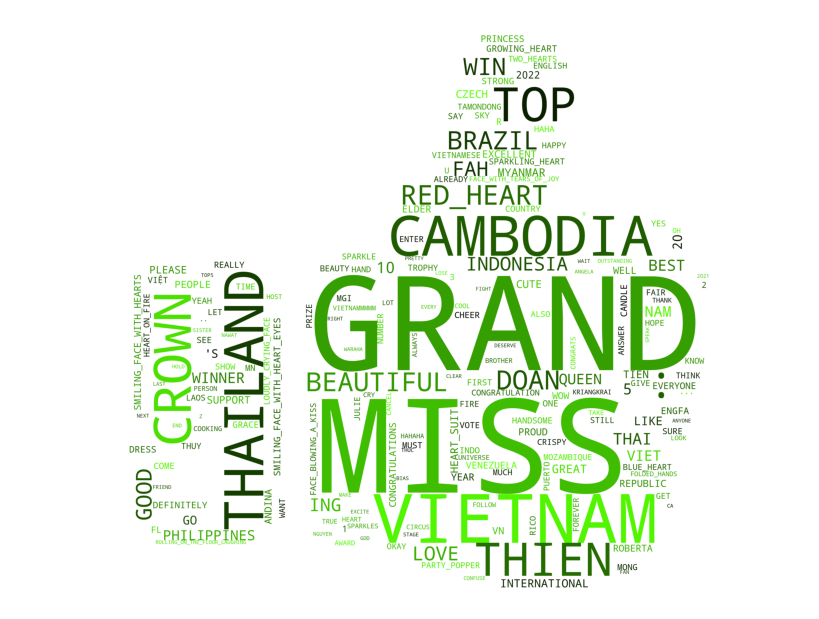

In [31]:

fdist = FreqDist(df_positive['lemmatized'].str.split().apply(pd.Series).stack())

mask_pos = np.array(Image.open('upvote.png'))
#colors = ImageColorGenerator(mask_pos)
def green_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(100,100%%, %d%%)" % np.random.randint(1,51))


wordcloud_pos = WordCloud(
                background_color ='white', 
                min_font_size = 10, mask = mask_pos,
                width = mask_pos.shape[1], height = mask_pos.shape[0],
                color_func= green_color_func,
                random_state=31).generate_from_frequencies(fdist)

# Display the word cloud
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_pos) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 


- Negative Sentiment WordCloud

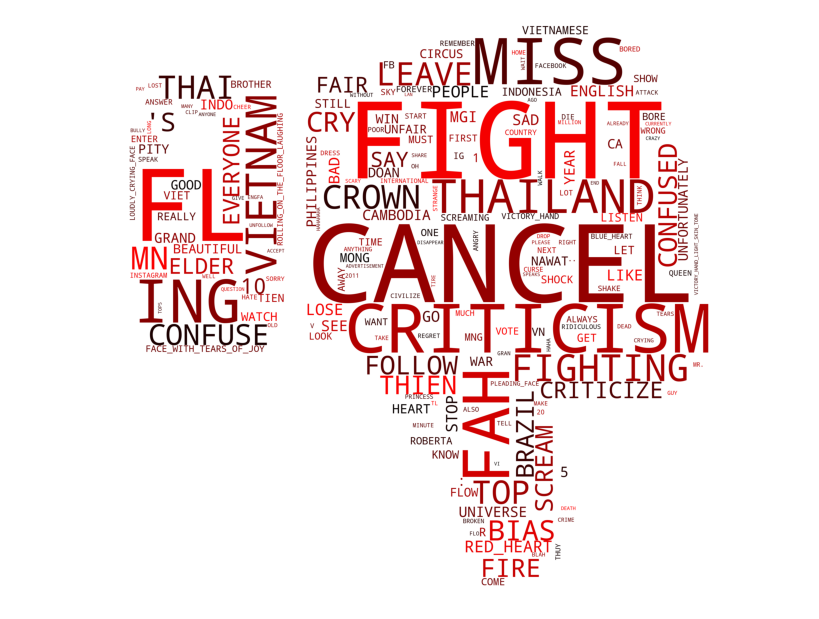

In [33]:
# Create a frequency distribution of the words in the lemmatized column
fdist = FreqDist(df_negative['lemmatized'].str.split().apply(pd.Series).stack())

mask_neg = np.array(Image.open('downvote.png'))

def red_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(0, 100%%, %d%%)" % (np.random.randint(1,51)))


# Create a word cloud object
wordcloud_neg = WordCloud(
                background_color ='white', 
                min_font_size = 10, mask = mask_neg,
                width = mask_neg.shape[1], height = mask_neg.shape[0],
                color_func= red_color_func,
                random_state=41).generate_from_frequencies(fdist)

# Display the word cloud
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_neg) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [34]:
df_clean.to_csv('df_clean.csv',index=False)

DASH